# Domain Knowledge

Relevant Medical Features:
- Body Mass Index (BMI): Higher BMI is a known risk factor for Type 2 diabetes.
- Blood Pressure (BP): Hypertension is a common comorbidity in diabetic patients and can exacerbate complications.
- Lipid Profile (Cholesterol, Triglycerides): Dyslipidemia is prevalent in people with diabetes and increases the risk of cardiovascular disease.
- Age and Gender: Age is a risk factor for Type 2 diabetes, and men may have slightly higher rates of diabetes.

Treatment Regimens
- Medications: Includes insulin, oral hypoglycemic agents (metformin, sulfonylureas, etc.), and newer classes like GLP-1 receptor agonists.
- Lifestyle Changes: Diet, exercise, and weight loss are essential for managing Type 2 diabetes.
- Monitoring: Regular monitoring of blood glucose levels, especially in insulin-dependent diabetics, is critical for management.

Lifestyle Factors
- Diet: Carbohydrate intake is closely linked to blood glucose levels.
- Physical Activity: Regular exercise increases insulin sensitivity and helps manage glucose levels.
- Smoking and Alcohol: Both are risk factors for diabetes complications, particularly cardiovascular diseases.

# Data Exploration

In [137]:
# %pip install pandas
# %pip install scipy
# %pip install numpy
# %pip install matplotlib
# %pip install scikit-learn
# %pip install statsmodels
%pip install pingouin

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [174]:
# import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import seaborn as sns
# from sklearn.compose import ColumnTransformer
# from sklearn import datasets, linear_model, preprocessing
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
# from scipy import stats
# import statsmodels.api as sm
import pingouin as pg

## Describing Data

About:
- Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

In [61]:
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True, scaled=True)

In [107]:
X_unscaled, y_unscaled = datasets.load_diabetes(return_X_y=True, as_frame=True, scaled=False)

In [108]:
df_unscaled = X_unscaled.join(y_unscaled).rename(columns={
    's1':'total serum cholesterol',
    's2':'low density lipoproteins',
    's3':'high density lipoproteins',
    's4':'total cholesterol',
    's5':'serum triglycerides level',
    's6':'blood sugar level'
})

In [62]:
# Create a dummy variable for Sex when the data is not scaled.

# X = pd.get_dummies(X, columns=['sex'], prefix='sex', dtype='float', drop_first=True)
# X['sex'] = X['sex'].replace({1:'male', 2:'female'}).astype('category')


In [64]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [83]:
X.describe().round(3)

,age,bmi,bp,total serum cholesterol,low density lipoproteins,high density lipoproteins,total cholesterol,serum triglycerides level,blood sugar level
count,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000
mean,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000
std,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048
min,-0.107,-0.090,-0.112,-0.127,-0.116,-0.102,-0.076,-0.126,-0.138
25%,-0.037,-0.034,-0.037,-0.034,-0.030,-0.035,-0.039,-0.033,-0.033
50%,0.005,-0.007,-0.006,-0.004,-0.004,-0.007,-0.003,-0.002,-0.001
75%,0.038,0.031,0.036,0.028,0.030,0.029,0.034,0.032,0.028
max,0.111,0.171,0.132,0.154,0.199,0.181,0.185,0.134,0.136


In [80]:
# Checking for any null/na records
X.notna().mean() * 100

age                          100.0
sex                          100.0
bmi                          100.0
bp                           100.0
total serum cholesterol      100.0
low density lipoproteins     100.0
high density lipoproteins    100.0
total cholesterol            100.0
serum triglycerides level    100.0
blood sugar level            100.0
dtype: float64

In [81]:
# the progression of diabetes response variable
y.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

## Exploring Data

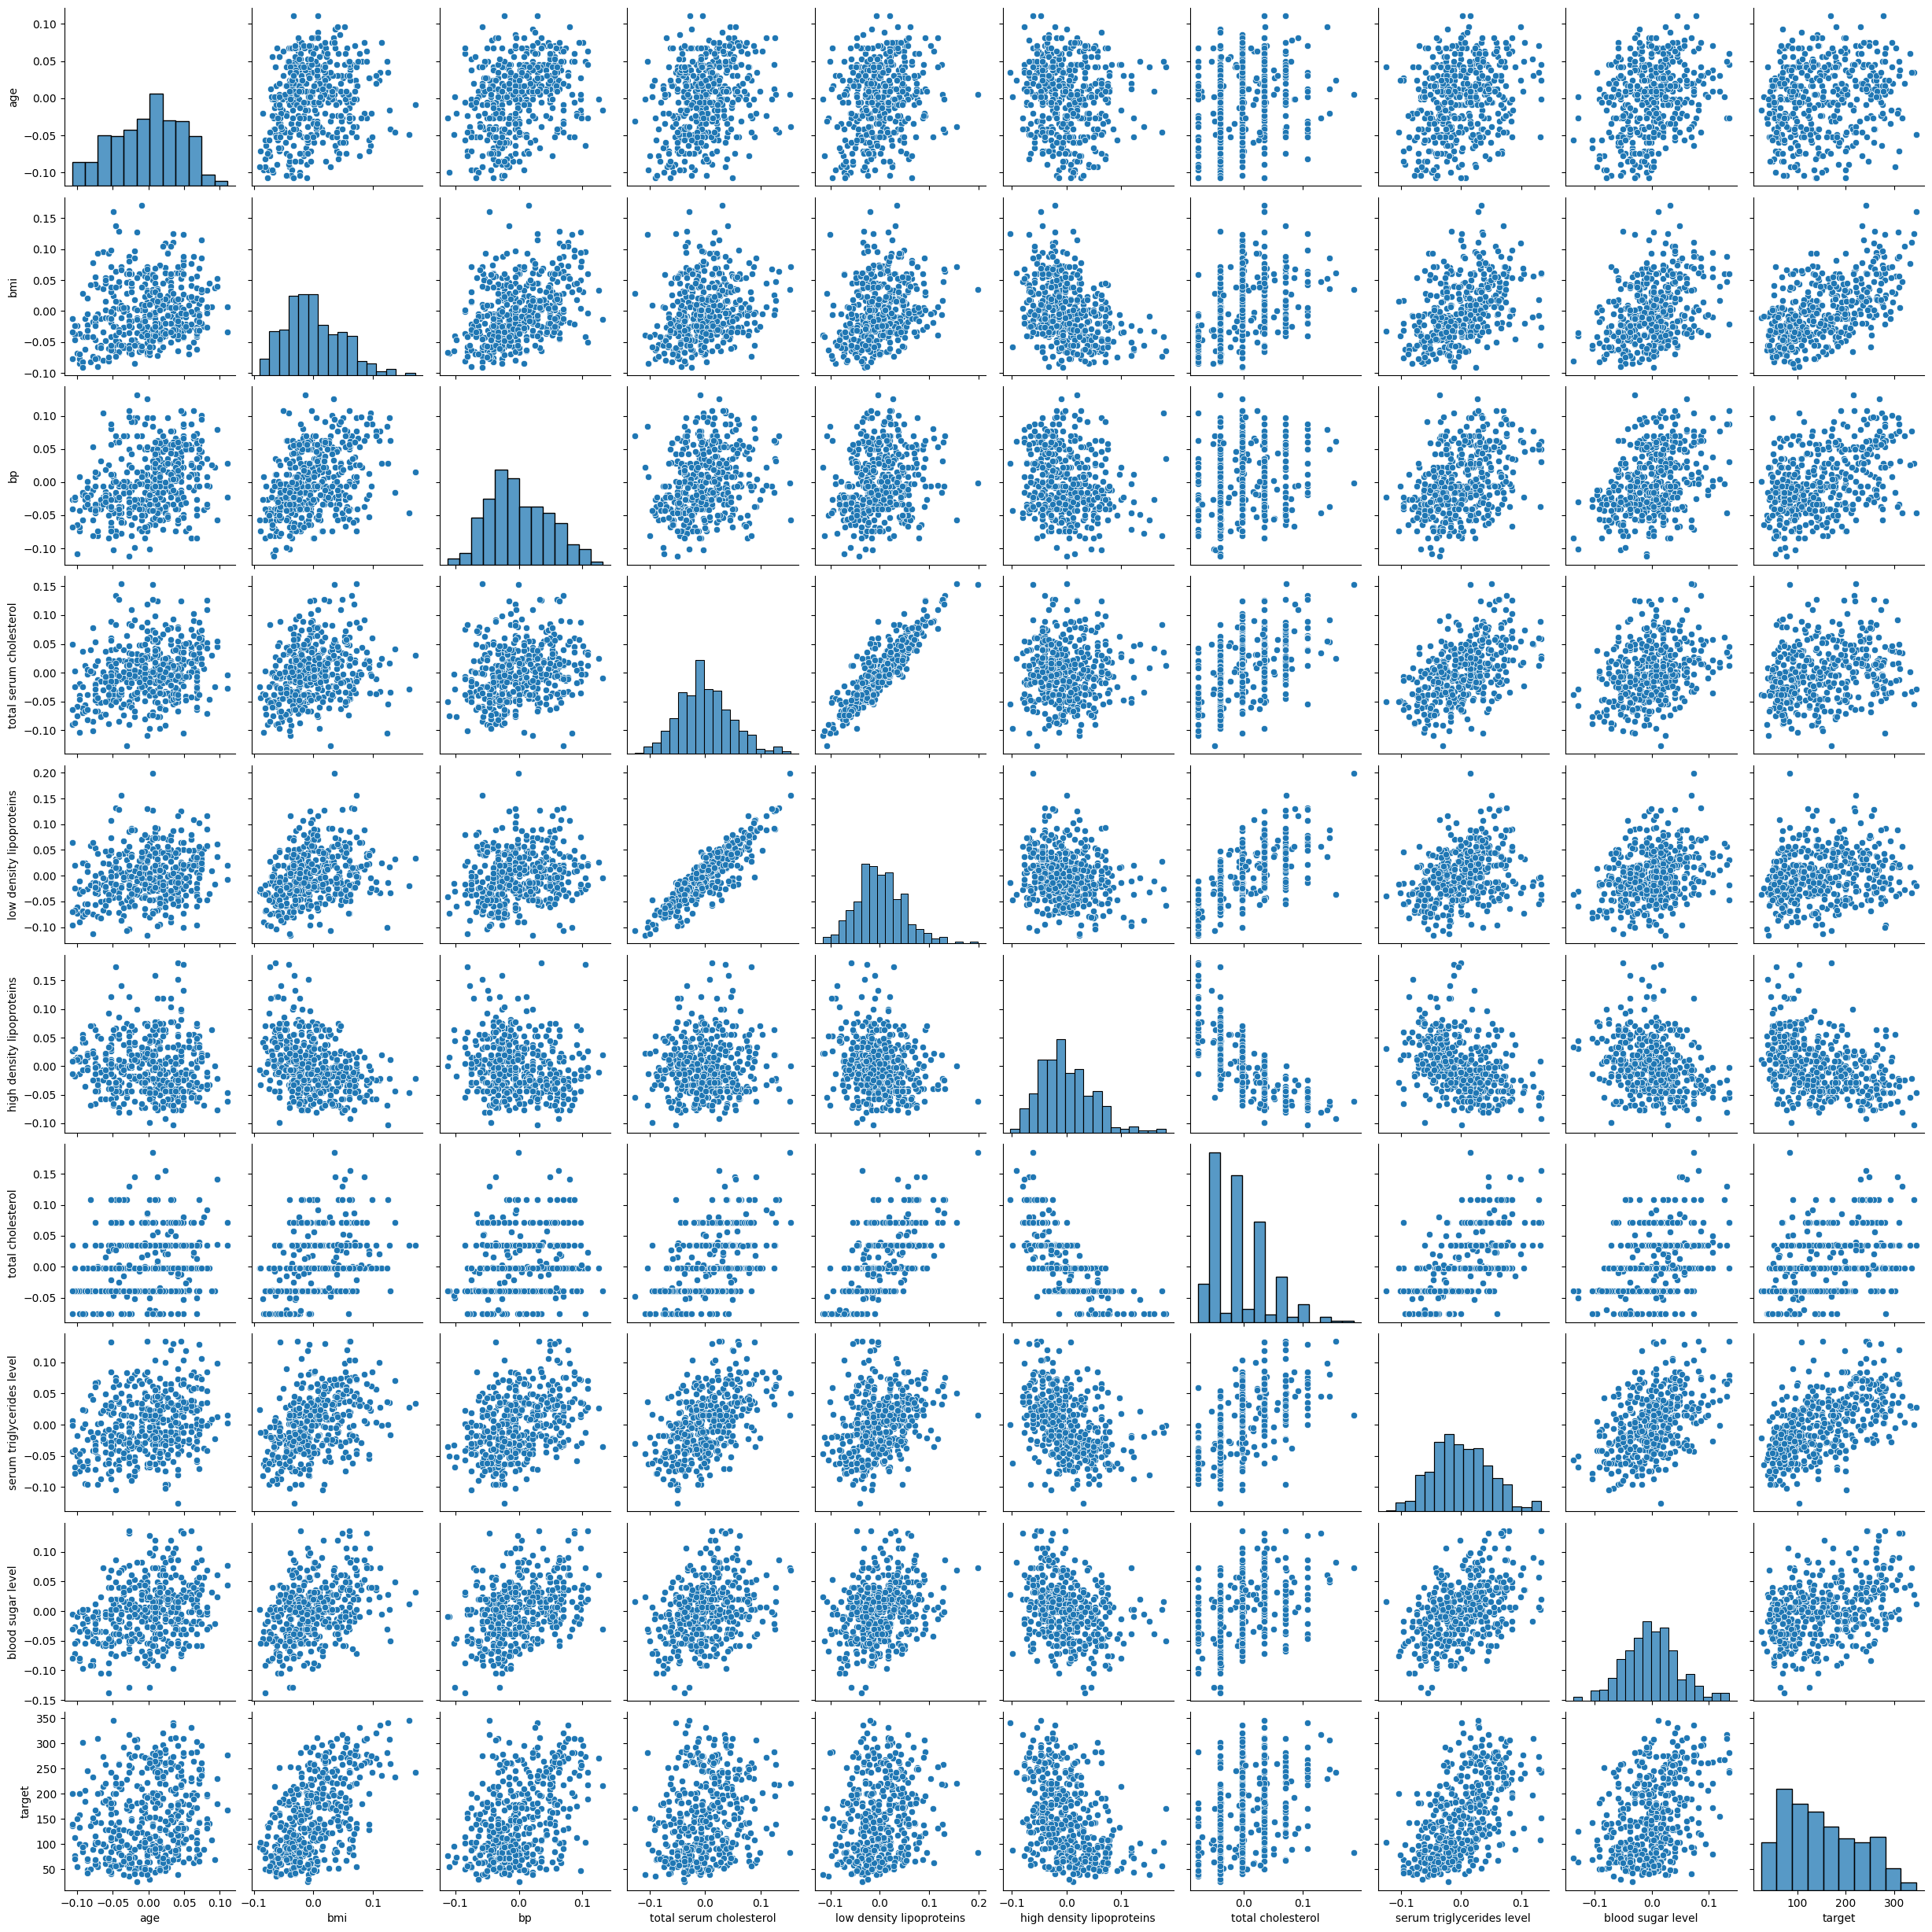

In [105]:
sns.pairplot(data=X.join(y))
plt.show()

Histograms:
- the distribution of the majority of features is roughly normally distributed minus total cholesterol.
- total cholesterol: the distribution has spikes are certain values. I wonder if this is caused by the standardization of the feature?
- target feature is skewed right

Scatter Plots:
- total cholesterol looks to be discrete and not continuous
- if there is a correlation most features appear positively correlated with each other minus high density lipoproteins. diagnose further with corr matrix
- one apparent strong correlation, low density lipoproteins & total serum cholesterol

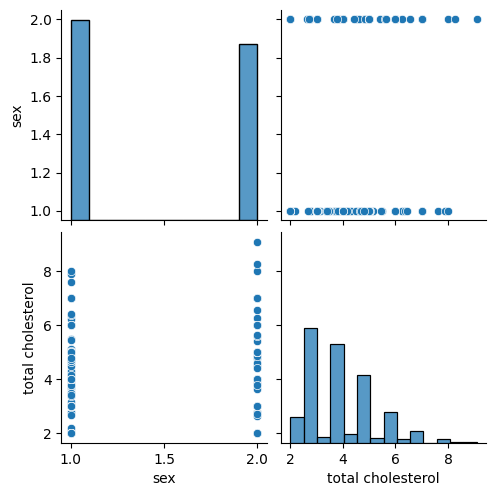

In [111]:
sns.pairplot(data=df_unscaled[['sex','total cholesterol']])
plt.show()

- total cholesterol: unscaled data shows the same distribution. lots of values on discrete numbers and a few floating point.
- sex: distribution is close to balanced

<Axes: xlabel='total serum cholesterol', ylabel='Count'>

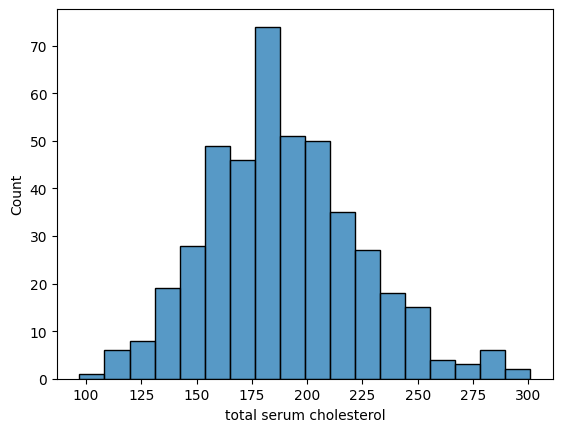

In [142]:
sns.histplot(x=df_unscaled['total serum cholesterol'], stat='count', bins='auto')

<Axes: xlabel='total serum cholesterol', ylabel='target'>

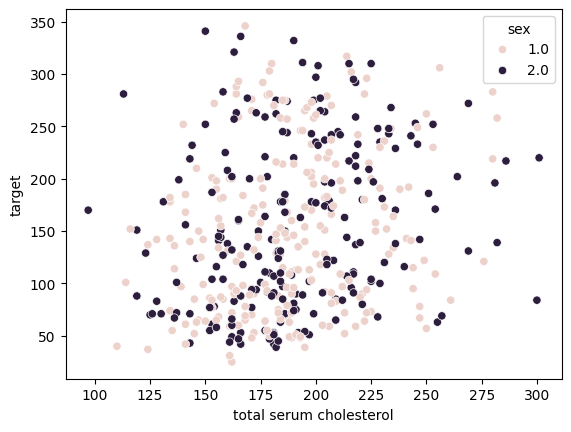

In [205]:
sns.scatterplot(data=df_unscaled, x=df_unscaled['total serum cholesterol'], y=df_unscaled['target'], hue="sex")

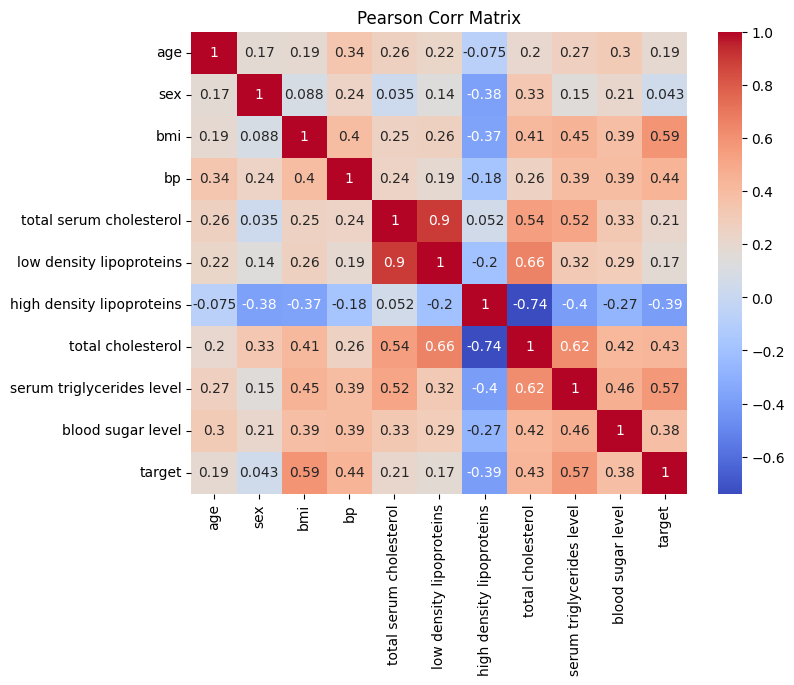

In [103]:
plt.figure(figsize=(8,6))
sns.heatmap(
    X.join(y).corr(), 
    annot=True, 
    cmap='coolwarm',
    )
plt.title("Pearson Corr Matrix")
plt.show()

- >0.80 corr: 
    - total serum cholesterol and low density lipoproteins
- >0.60 to 0.80 corr:
    - total cholesterol and low density lipoproteins
    - total cholesterol and high density lipoporteins (neg)
    - serum triglycerides level and total cholesterol
- >0.40 to 0.60:
    - bp and bmi
    - total cholesterol and total serum cholesterol
    - serum triglycerides level and bmi
    - serum triglcyerides level and total serum cholesterol
    - serum triglycerides level and high density lipoprotiens (neg)
    - blood sugar level and total cholesterol
    - blood sugar level and serum triglycerides level
    - target and bmi
    - target and bp
    - target and total cholesterol
    - target and serum triglycerides level

# Data Preparation

In [69]:
df = pd.merge(X, y, left_index=True, right_index=True)

df = df.rename(columns={
    's1':'total serum cholesterol',
    's2':'low density lipoproteins',
    's3':'high density lipoproteins',
    's4':'total cholesterol',
    's5':'serum triglycerides level',
    's6':'blood sugar level'
})

df

,age,sex,bmi,bp,total serum cholesterol,low density lipoproteins,high density lipoproteins,total cholesterol,serum triglycerides level,blood sugar level,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [71]:
X = X.rename(columns={
    's1':'total serum cholesterol',
    's2':'low density lipoproteins',
    's3':'high density lipoproteins',
    's4':'total cholesterol',
    's5':'serum triglycerides level',
    's6':'blood sugar level'
})


# Modeling

In [207]:
lm = pg.linear_regression(df_unscaled['total serum cholesterol'], df_unscaled['target'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,62.80,19.95,3.15,0.0,0.04,0.04,23.58,102.02
1,total serum cholesterol,0.47,0.10,4.55,0.0,0.04,0.04,0.27,0.68


Interpretation:
- Intercept
    - coef: the intercept coef is 152, meaning if total serum cholesterol is 0, the predicted target (diabetes progression) would be 152. this is the base value when no other value is being considered.
    - se: low standard error which suggests a more precise estimate
    - T: high value indicates that the coef is significantly different from zero
    - pval: < 0.05 implies significant predictor
    - r2: 0.04 or 4% of the variance can be explained by total serum cholesterol
    - adj_r2:
    - CI: 95% confident that the true value of the intercept lies between 145 and 159
- total serum cholesterol
    - coef: this is the slope of the regression line, which represents how much the target is expected to change for each unit increase in total serum cholesterol. in this case, a 1 unit increase in total serum cholesterol increases the target by 343.
    - se: seems like a high standard error given the range of target (25 min, 346 max), therefore the estimate doesn't appear precise
    - T: low value indicates that the coef isn't significantly different from zero
    - pval: < 0.05 implies significant predictor
    - r2: 
    - adj_r2:
    - CI: 95% confident that the true value lies between 195 and 491

In [210]:
lm = pg.linear_regression(df_unscaled['low density lipoproteins'], df_unscaled['target'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,101.20,14.20,7.12,0.0,0.03,0.03,73.28,129.12
1,low density lipoproteins,0.44,0.12,3.71,0.0,0.03,0.03,0.21,0.68


In [211]:
lm = pg.linear_regression(df_unscaled[['total serum cholesterol','low density lipoproteins']], df_unscaled['target'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,55.82,21.88,2.55,0.01,0.05,0.04,12.81,98.84
1,total serum cholesterol,0.64,0.23,2.71,0.01,0.05,0.04,0.18,1.10
2,low density lipoproteins,-0.21,0.27,-0.78,0.44,0.05,0.04,-0.73,0.32


In [216]:
lm = pg.linear_regression(
    df_unscaled[[
    'age',
    'sex',
    'bmi',
    'bp',
    'total serum cholesterol',
    'low density lipoproteins',
    'high density lipoproteins',
    'total cholesterol',
    'serum triglycerides level',
    'blood sugar level'
    ]], 
    df_unscaled['target'],
    relimp=True,
    add_intercept=True
)
lm.sort_values(by='relimp', ascending=False).round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%],relimp,relimp_perc
3,bmi,5.60,0.72,7.81,0.00,0.52,0.51,4.19,7.01,0.15,29.29
9,serum triglycerides level,68.48,15.67,4.37,0.00,0.52,0.51,37.68,99.28,0.12,22.55
4,bp,1.12,0.23,4.96,0.00,0.52,0.51,0.67,1.56,0.07,14.07
7,high density lipoproteins,0.37,0.78,0.48,0.63,0.52,0.51,-1.17,1.91,0.05,9.01
8,total cholesterol,6.53,5.96,1.10,0.27,0.52,0.51,-5.18,18.25,0.05,8.96
10,blood sugar level,0.28,0.27,1.02,0.31,0.52,0.51,-0.26,0.82,0.03,6.53
5,total serum cholesterol,-1.09,0.57,-1.90,0.06,0.52,0.51,-2.22,0.04,0.02,3.25
6,low density lipoproteins,0.75,0.53,1.41,0.16,0.52,0.51,-0.30,1.79,0.01,2.60
2,sex,-22.86,5.84,-3.92,0.00,0.52,0.51,-34.33,-11.39,0.01,2.52
1,age,-0.04,0.22,-0.17,0.87,0.52,0.51,-0.46,0.39,0.01,1.23


In [219]:
lm = pg.linear_regression(df_unscaled[['bmi']], df_unscaled['target'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-117.77,18.02,-6.54,0.0,0.34,0.34,-153.19,-82.36
1,bmi,10.23,0.67,15.19,0.0,0.34,0.34,8.91,11.56


In [220]:
lm = pg.linear_regression(df_unscaled[['serum triglycerides level']], df_unscaled['target'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-235.48,27.09,-8.69,0.0,0.32,0.32,-288.72,-182.23
1,serum triglycerides level,83.51,5.80,14.40,0.0,0.32,0.32,72.11,94.91


In [228]:
lm = pg.linear_regression(df_unscaled[['bmi', 'serum triglycerides level']], df_unscaled['target'], relimp=True)
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%],relimp,relimp_perc
0,Intercept,-299.96,24.93,-12.03,0.0,0.46,0.46,-348.96,-250.95,NaN,NaN
1,bmi,7.28,0.68,10.64,0.0,0.46,0.46,5.93,8.62,0.24,52.58
2,serum triglycerides level,56.06,5.79,9.69,0.0,0.46,0.46,44.68,67.43,0.22,47.42


In [214]:
lm_residuals = pd.DataFrame(data=lm.residuals_, columns=['residuals'])
df_unscaled.join(lm_residuals)

,age,sex,bmi,bp,total serum cholesterol,low density lipoproteins,high density lipoproteins,total cholesterol,serum triglycerides level,blood sugar level,target,residuals
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0,-55.116677
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0,6.928967
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0,-35.882790
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0,39.085542
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0,6.537742
...,...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0,-15.017565
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0,2.944186
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0,10.773319
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0,8.141055


Partial Correlation

In [230]:
pg.partial_corr(data=df_unscaled, x='bmi', y='target', covar='age').round(3)

,n,r,CI95%,p-val
pearson,442,0.572,"[0.51, 0.63]",0.0
